# 几何均值滤波

In [1]:
#coding:utf-8
%matplotlib inline
import numpy as np
import scipy
from scipy.special import comb
import matplotlib.pyplot as plt
import cv2
from scipy import stats
import scipy.ndimage.filters as nd_filters
import time

In [2]:
gray = cv2.imread('../../datas/f4.jpg',0)
rgb = cv2.cvtColor(cv2.imread('../../datas/f4.jpg'),cv2.COLOR_BGR2RGB)
rows,cols,ch = rgb.shape

In [4]:
def noise_gaussian(M,N,a = 0,b=1):
    R = a + b * np.random.randn(M,N)
    return R

In [5]:
noise = noise_gaussian(rows,cols,a=0,b=0.1)
src_noise_gray = gray.astype(np.float32) + noise * 255
src_noise_gray[src_noise_gray < 0] = 0
src_noise_gray[src_noise_gray > 255] = 255
src_noise_gray = src_noise_gray.astype(np.uint8)

In [18]:
def geometry_filter(src,m=3,n=3):
    kernel = np.ones((m,n),dtype=np.float32)
    src_f = src.astype(np.float32)
    eps = 1.0e-5
    dst = np.exp(cv2.filter2D(np.log(src_f+eps),-1,kernel)) ** (1. / m / n)
#     dst = dst
    dst[dst < 0] = 0
    dst[dst > 255] = 255
    dst = dst.astype(np.uint8)
    return dst

In [19]:
dst = geometry_filter(src_noise_gray,3,3)

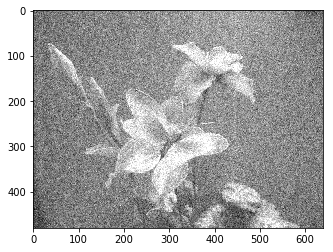

In [21]:
plt.imshow(src_noise_gray,'gray')

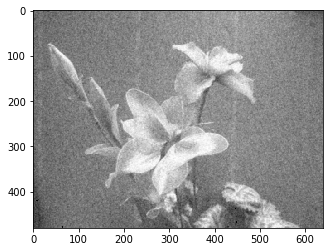

In [20]:
plt.imshow(dst,'gray')